# Homework 1

## Chotpisit Adunsehawat

## Metrics

|   Model A  | Predicted dog | Predicted cat |
|:----------:|:-------------:|:-------------:|
| Actual dog |       30      |       20      |
| Actual cat |       10      |       40      |

### T1

Accuracy = (TP + TN) / (TP + TN + FP + FN) = (30 + 40) / (30 + 20 + 10 + 40) = 0.7

### T2

Precision = TP / (TP + FP) = 40 / (40 + 20) = 0.67
Recall = TP / (TP + FN) =  40 / (40 + 10) = 0.8
F1 =  2 * TP / (2*TP + FP + FN) = 2 * 40 / (2 * 40 + 20 + 10) = 0.73

### T3

Accuracy = (TP + TN) / (TP + TN + FP + FN) = (30 + 40) / 100 = 0.7
Precision = TP / (TP + FP) = 30 / (30 + 10) = 0.75
Recall = TP / (TP + FN) =  30 / (30 + 20) = 0.6
F1 =  2 * TP / (2*TP + FP + FN) = 2 * 30 / (2 * 30 + 10 + 20) = 0.67

### T4

Let x be the total population
Actual dog = 0.2x
Actual cat = 0.8x

Calculate the new values
TP = 0.2x * 30 / (30 + 20) = 0.12x
FN = 0.2x * 20 / (30 + 20) = 0.08x  
FP = 0.8x * 10 / (10 + 40) = 0.16x
TN = 0.8x * 40 / (10 + 40) = 0.64x

Precision = 0.12x / (0.12x + 0.16x) = 0.4285
Recall = 0.12x / (0.12x + 0.08x) = 0.6
F1 = 2 * 0.4285 * 0.6 / (0.4285 + 0.6) = 0.49995


### OT1

Accuracy = (TP + TN) / (TP + TN + FP + FN) = 1 / (1 + (FP + FN) / (TP + TN)) 
F1 = 2TP / (2*TP + FP + FN) = 1 / (1 + (FP + FN / (2*TP)))

Case TN = TP: Accraucy = F1
Case TN > TP: Accraucy > F1
Case TN < TP: Accraucy < F1

---

## Hello Clustering

### T5

#### Round 1

Centriod 1 have assigned points (3, 3), (8, 8), (6, 6), (7, 7)
The updated centriod = (6, 6)

Centriod 2 have assigned points (1, 2), (2, 2)
The updated centriod = (1.5, 2)

Centriod 3 have assigned points (-3, -3), (2, -4), (-7, -7)
The updated centriod = (-4, -4.67)


#### Round 2

Centriod 1 have assigned points (8, 8), (6, 6), (7, 7)
The updated centriod = (7, 7)

Centriod 2 have assigned points (1, 2), (2, 2), (3, 3)
The updated centriod = (2, 2.33)

Centriod 3 have assigned points (-3, -3), (2, -4), (-7, -7)
The updated centriod = (-4, -4.67)

#### Round 3

Centriod 1 have assigned points (8, 8), (6, 6), (7, 7)
The updated centriod = (7, 7)

Centriod 2 have assigned points (1, 2), (2, 2), (3, 3)
The updated centriod = (2, 2.33)

Centriod 3 have assigned points (-3, -3), (2, -4), (-7, -7)
The updated centriod = (-4, -4.67)

The centriods in round 3 do not change. So the centriods is (7, 7), (2, 2.33), (-4, -4.67)


### T6

The centriods change to (-2.5, -3.5), (4.5, 4.67), (-7, -7)


  



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [10]:
class KMeans: 
  def __init__(self, points, starting_centriods):
    self.points = points
    self.centriods = starting_centriods
    self.clusters = self.__find_clusters()
    self.iterations = 0

  def __find_clusters(self):
    centriods = self.centriods.copy()
    points = self.points.copy()
    clusters = [[] for _ in range(len(centriods))]
    for point in points.to_numpy():
      distances = []
      for centroid in centriods.to_numpy():
        distance = np.linalg.norm(point - centroid)
        distances.append(distance)
      clusters[np.argmin(distances)].append(point)
    self.clusters = clusters
    return clusters
  
  def __update_centriods(self):
    centriods = self.centriods.copy()
    clusters = self.clusters.copy()
    for i in range(len(clusters)):
      clustered_points = clusters[i]
      centriods.iloc[i] = np.mean(clustered_points, axis=0)
    return centriods

  def run(self):
    self.centriods = self.__update_centriods()
    self.clusters = self.__find_clusters()
    self.iterations += 1

  def plot(self):
    colors = ['violet', 'limegreen', 'skyblue']
    darken_colors = ['indigo', 'green', 'blue']
    for i in range(len(self.clusters)):
      clustered_points = np.array(self.clusters[i])
      plt.scatter(clustered_points[:, 0], clustered_points[:, 1], label=i, c=colors[i])
      plt.scatter(self.centriods['x'][i], self.centriods['y'][i], marker='*', c=darken_colors[i])
    plt.legend()
    plt.show()

In [11]:
x = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7])
y = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
dataframe_points = pd.DataFrame({'x': x, 'y': y})

C:\Users\Vivobook\AppData\Local\Temp\ipykernel_26040\51268784.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  centriods.iloc[i] = np.mean(clustered_points, axis=0)
C:\Users\Vivobook\AppData\Local\Temp\ipykernel_26040\51268784.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4.666666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  centriods.iloc[i] = np.mean(clustered_points, axis=0)


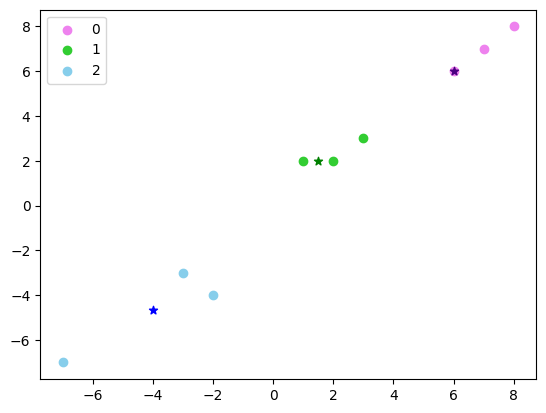

C:\Users\Vivobook\AppData\Local\Temp\ipykernel_26040\51268784.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  centriods.iloc[i] = np.mean(clustered_points, axis=0)
C:\Users\Vivobook\AppData\Local\Temp\ipykernel_26040\51268784.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  centriods.iloc[i] = np.mean(clustered_points, axis=0)


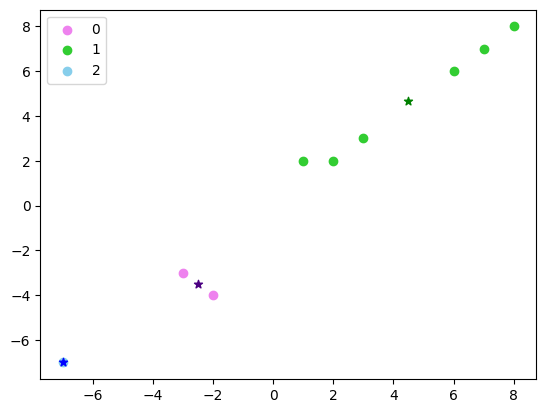

In [12]:

starting_centriods = pd.DataFrame({
  'x': [3, 2, -3], 
  'y': [3, 2, -3]
})
kMeans = KMeans(dataframe_points, starting_centriods)
kMeans.run()
kMeans.plot()

starting_centriods = pd.DataFrame({
  'x': [-3, 2, -7], 
  'y': [-3, 2, -7]
})
kMeans = KMeans(dataframe_points, starting_centriods)
kMeans.run()
kMeans.plot()

### T7

Judging from using my eyes, T5 is better because the grouping is more complete and is distributed equally.

The goodness of the starting point can be measured using various metrics such as Silhouette Score, Within-Cluter Sum of Square, Variance Ratio, etc.

### OT2
K = 4 is the best for this data because of two reasons. First, I used my eyes to clearly see the grouping. Second, I used fraction of explained variance = 410.55 / 418.22 = 0.9816


## My heart will go on 

In [280]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

train['Age'] = train["Age"].median()
test['Age'] = test["Age"].median()

### T8

Median of age = 28


### T9

In [281]:
embark_mode = train['Embarked'].mode()[0]
train["Embarked"] = train["Embarked"].fillna(embark_mode)
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

sex_mode = train["Sex"].mode()[0]
train["Sex"] = train["Sex"].fillna(sex_mode)
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

### T10

In [282]:
def sigmoid(x):
  return np.array(1/(1+np.exp(-x)))

def cost(theta, data, y):
  m = data.shape[0]
  predictions = np.array(sigmoid(np.dot(data, theta)))
  cost = -(1/m)*(np.dot(y, np.log(predictions.T+1e-5)) + np.dot((1-y), np.log(1-predictions.T+1e-5)))
  return cost

def gradient(theta, data, y):
  m = data.shape[0]
  predictions = sigmoid(np.dot(data, theta))
  error = predictions - y
  gradient = (1/m)*np.dot(data.T, error)
  return gradient

def gradient_descent(theta, data, y, alpha, iteration=10000):
  cost_history = []
  for _ in range(iteration):
    cost_history.append(cost(theta, data, y))
    theta = theta - alpha*gradient(theta, data, y)
  return theta, cost_history

def predict(data, theta, raw):
  predictions = np.array(sigmoid(np.dot(data, theta)))
  predictions = np.where(predictions >  0.5, 1, predictions)
  predictions = np.where(predictions <= 0.5, 0, predictions)
  predictions = np.array(predictions, dtype = int)
  print("Survived", np.count_nonzero(predictions))
  result = pd.DataFrame({
    "PassengerId": raw["PassengerId"],
    "Survived": predictions
  })
  return result
def compare_prediction(actual, prediction):
  df = pd.DataFrame({
    "Actual": actual,
    "Prediction": prediction,
    "Compare": actual == prediction
  })
  return df["Compare"].sum()/len(actual)


In [283]:
embark_mode = test['Embarked'].mode()[0]
test["Embarked"] = test["Embarked"].fillna(embark_mode)
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2

sex_mode = test["Sex"].mode()[0]
test["Sex"] = test["Sex"].fillna(sex_mode)
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

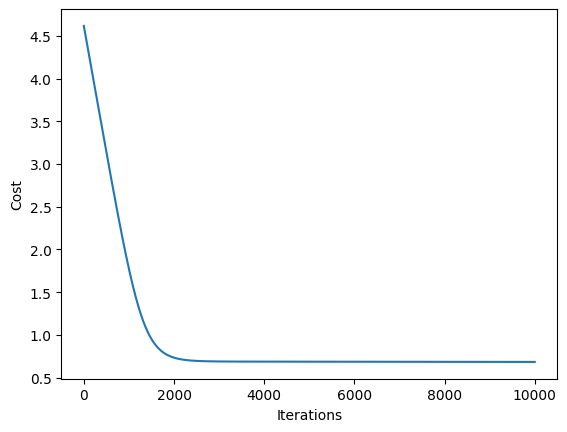

[ 0.58826856  0.77799758 -0.08171125  0.37921105]


In [287]:
train_df = copy.deepcopy(train)
test_df  = copy.deepcopy(test)

train_data = np.array(train_df[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
test_data = np.array(test_df[["Pclass","Sex","Age","Embarked"]].values, dtype = float)

train_y = np.array(train_df[["Survived"]].values, dtype = float)
train_y = train_y.reshape(train_y.size)

features = train_data.shape[1]
theta = np.random.random(features)
alpha = 0.00001
iterations = 100000
theta, cost_history = gradient_descent(theta, train_data, train_y, alpha)
plt.plot(cost_history)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

print(theta)

In [288]:
print("Train Survived", np.count_nonzero(train["Survived"]))
result = predict(train_data, theta, train_df)
print("Accuracy", compare_prediction(train_y, result["Survived"]))
result = predict(test_data, theta, test_df)
result.to_csv("submission_T10.csv", index = False)

Train Survived 342
Survived 192
Accuracy 0.5892255892255892
Survived 94


### T11

![image.png](T10.png)

### T12

C:\Users\Vivobook\AppData\Local\Temp\ipykernel_26040\3505015560.py:2: RuntimeWarning: overflow encountered in exp
  return np.array(1/(1+np.exp(-x)))


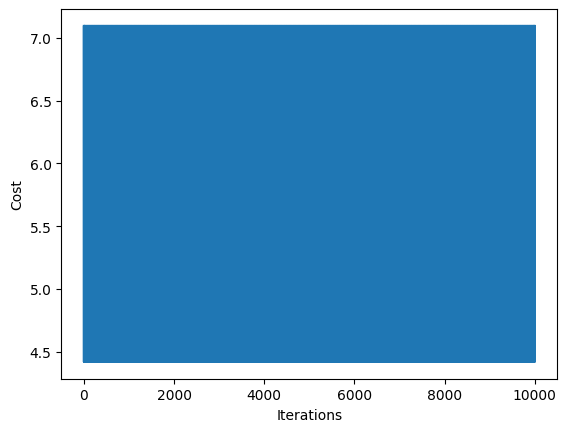

[ 0.14694769  0.85049862  0.82746474  0.99334494  0.02967911 -1.29775894]
Train Survived 342
Survived 0
Accuracy 0.6161616161616161
Survived 0


In [290]:
train_df = copy.deepcopy(train)
test_df  = copy.deepcopy(test)

train_df["Age_2"] = train_df['Age'] ** 2
test_df["Age_2"] = test_df['Age'] ** 2

train_df["Age_3"] = train_df['Age'] ** 3
test_df["Age_3"] = test_df['Age'] ** 3

train_df["Age_3"] = train_df['Age'] ** 3
test_df["Age_3"] = test_df['Age'] ** 3


train_data = np.array(train_df[["Pclass","Sex","Age","Embarked", "Age_2", "Age_3"]].values, dtype = float)
test_data = np.array(test_df[["Pclass","Sex","Age","Embarked", "Age_2", "Age_3"]].values, dtype = float)

train_y = np.array(train_df[["Survived"]].values, dtype = float)
train_y = train_y.reshape(train_y.size)

features = train_data.shape[1]
theta = np.random.random(features)
alpha = 0.0001
iterations = 10000
theta, cost_history = gradient_descent(theta, train_data, train_y, alpha)
plt.plot(cost_history)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

print(theta)

print("Train Survived", np.count_nonzero(train["Survived"]))
result = predict(train_data, theta, train_df)
print("Accuracy", compare_prediction(train_y, result["Survived"]))
result = predict(test_data, theta, test_df)
result.to_csv("submission_T12.csv", index = False)

The accuaracy increases to 0.62

### T13

In [ ]:
train_df = copy.deepcopy(train)
test_df  = copy.deepcopy(test)

train_data = np.array(train_df[["Sex","Age"]].values, dtype = float)
test_data = np.array(test_df[["Sex","Age"]].values, dtype = float)

train_y = np.array(train_df[["Survived"]].values, dtype = float)
train_y = train_y.reshape(train_y.size)

features = train_data.shape[1]
theta = np.random.random(features)
alpha = 0.0001
iterations = 10000
theta, cost_history = gradient_descent(theta, train_data, train_y, alpha)
plt.plot(cost_history)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

print(theta)

print("Train Survived", np.count_nonzero(train["Survived"]))
result = predict(train_data, theta, train_df)
print("Accuracy", compare_prediction(train_y, result["Survived"]))
result = predict(test_data, theta, test_df)
result.to_csv("submission_T13.csv", index = False)